# Reading

In [1]:
#import h5py as h5
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook
import h5hep as hp

import lichen.lichen as lch

In [2]:
filename = 'HEP_random_file_LARGE.hdf5'

################### H5HEP ###########################
data,event = hp.hd5events(filename,verbose=False)


In [3]:
# Let's examine the 'data' dictionary. 
print(data)

{'counters': {'MET': 'MET/nMET', 'electron': 'electron/nelectron', 'jet': 'jet/njet', 'muon': 'muon/nmuon', 'photon': 'photon/nphoton'}, 'list_of_counters': ['MET/nMET', 'electron/nelectron', 'jet/njet', 'muon/nmuon', 'photon/nphoton'], 'MET/nMET': array([0, 0, 0, ..., 0, 0, 0]), 'MET/index': array([0, 0, 0, ..., 0, 0, 0]), 'MET/phi': array([], dtype=float32), 'MET/pt': array([], dtype=float32), 'electron/e': array([  90.99176025,   93.66407776,  176.05529785, ...,   70.08474731,
        106.63319397,   82.74927521], dtype=float32), 'electron/nelectron': array([6, 0, 3, ..., 1, 3, 7]), 'electron/index': array([     0,      6,      6, ..., 450431, 450432, 450435]), 'electron/px': array([  17.81813622,   47.60125732,  124.77809143, ...,   55.83596802,
         86.38316345,   38.97683716], dtype=float32), 'electron/py': array([ 88.76008606,  56.01567459,  92.32170105, ...,  17.71736717,
        57.29434204,  34.26693344], dtype=float32), 'electron/pz': array([  9.14669323,  58.04587555,  

In [4]:
data.keys()

dict_keys(['counters', 'list_of_counters', 'MET/nMET', 'MET/index', 'MET/phi', 'MET/pt', 'electron/e', 'electron/nelectron', 'electron/index', 'electron/px', 'electron/py', 'electron/pz', 'electron/q', 'jet/btag', 'jet/e', 'jet/njet', 'jet/index', 'jet/px', 'jet/py', 'jet/pz', 'muon/e', 'muon/nmuon', 'muon/index', 'muon/px', 'muon/py', 'muon/pz', 'muon/q', 'photon/e', 'photon/nphoton', 'photon/index', 'photon/px', 'photon/py', 'photon/pz'])

In [5]:
event

{'MET/nMET': None,
 'MET/phi': None,
 'MET/pt': None,
 'electron/e': None,
 'electron/nelectron': None,
 'electron/px': None,
 'electron/py': None,
 'electron/pz': None,
 'electron/q': None,
 'jet/btag': None,
 'jet/e': None,
 'jet/njet': None,
 'jet/px': None,
 'jet/py': None,
 'jet/pz': None,
 'muon/e': None,
 'muon/nmuon': None,
 'muon/px': None,
 'muon/py': None,
 'muon/pz': None,
 'muon/q': None,
 'photon/e': None,
 'photon/nphoton': None,
 'photon/px': None,
 'photon/py': None,
 'photon/pz': None}

In [6]:
e = data['jet/e']
print(len(e))
print(type(e))

448940
<class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


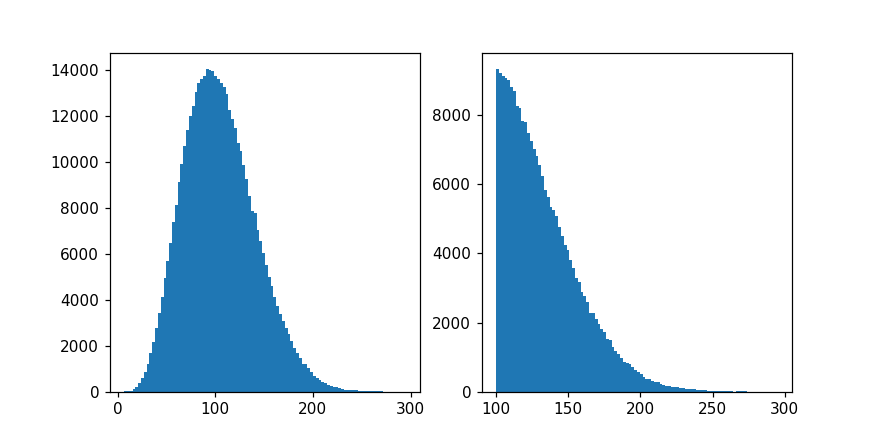

In [7]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(e,bins=100);

plt.subplot(1,2,2)
plt.hist(e[e>100],bins=100);

In [8]:
px = data['jet/px']
py = data['jet/py']
pz = data['jet/pz']

m = np.sqrt(e*e - (px*px + py*py + pz*pz))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


<IPython.core.display.Javascript object>


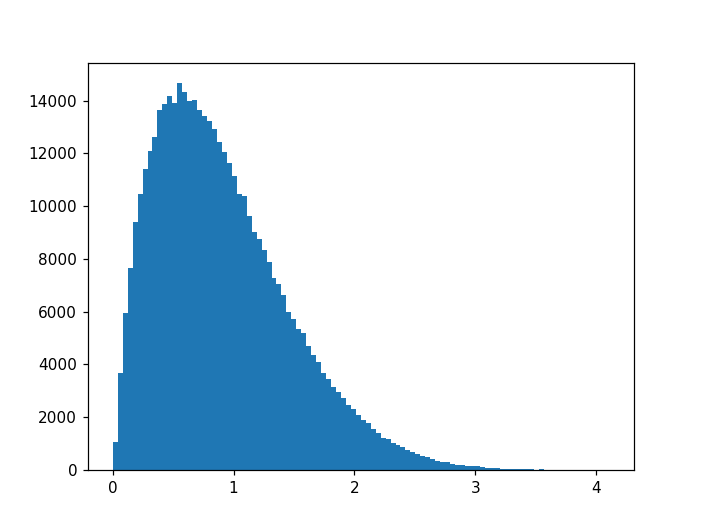

In [9]:
plt.figure()
plt.hist(m[m==m],bins=100);

# Looping over events

In [10]:
################### H5HEP ###########################
hp.get_event(event,data,n=10)

print(event)



{'MET/nMET': 0, 'MET/phi': array([], dtype=float32), 'MET/pt': array([], dtype=float32), 'electron/e': array([  72.02539062,   67.28862762,   80.63044739,  175.99937439], dtype=float32), 'electron/nelectron': 4, 'electron/px': array([ 67.67681885,  40.1694603 ,  23.12826157,  77.60784149], dtype=float32), 'electron/py': array([  15.38031006,   38.95376205,   38.35308075,  153.82792664], dtype=float32), 'electron/pz': array([ 19.26011276,  37.37350464,  67.04769897,  35.91340256], dtype=float32), 'electron/q': array([ 1, -1, -1,  1]), 'jet/btag': array([ 0.5813573 ,  0.57907605,  0.32733011,  0.49558449,  0.25726709,
        0.05297694], dtype=float32), 'jet/e': array([  96.66043091,  139.04524231,  146.58518982,  132.84169006,
        135.68585205,  154.86392212], dtype=float32), 'jet/njet': 6, 'jet/px': array([  24.23896217,   43.57424545,   63.31398392,   91.37436676,
         52.39350128,  104.93590546], dtype=float32), 'jet/py': array([  15.84566116,   76.72499084,   45.80184174,  

In [11]:
event['jet/njet']

6

In [12]:
event['jet/e']

array([  96.66043091,  139.04524231,  146.58518982,  132.84169006,
        135.68585205,  154.86392212], dtype=float32)

In [13]:
nevents = len(data['jet/njet'])
print("nevents: ",nevents)

nevents:  100000


In [14]:
hi_pt = []

for i in range(0,nevents):
    
    if (i%10000==0):
        print(i)
    
    ################### H5HEP ###########################
    hp.get_event(event,data,n=i)
    
    if event['jet/njet']>0:
        px = event['jet/px']
        py = event['jet/py']
        
        pt = np.sqrt(px*px + py*py)
        
        hi_pt.append(max(pt))
    
print(len(hi_pt))



    
    

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
89944


<IPython.core.display.Javascript object>


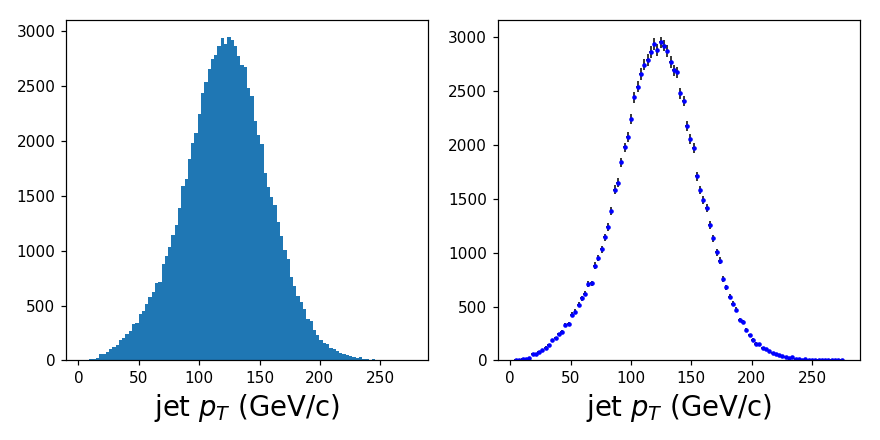

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(hi_pt,bins=100);
plt.xlabel(r'jet $p_T$ (GeV/c)',fontsize=18)
    
plt.subplot(1,2,2)
lch.hist_err(hi_pt,bins=100);
plt.xlabel(r'jet $p_T$ (GeV/c)',fontsize=18)

plt.tight_layout()